# Overview

Hi, I'm Jalal. This is my individual project that I've created from scraping ***Gramedia Official Site*** ( The biggest bookstore in Indonesia ). The goals are :
- **Identify** what things that have **a significant effect** on **book price**
- Create a **regression model** to predict the price

There are some variables that I've got from the website :
1. Link of the book
2. Title
3. Author
4. Publisher
5. Type of cover (sot, hard, ebook)
6. Number of pages
7. Publish date
8. Language
9. Price
10. Book width (cm)
11. Book length (cm)
12. Store
13. Region of store
14. Book weight (kg)

I was scraping **nonfiction** and **fiction** categories. And from that, I broke down into **several subcategories** such as self-development, comic, religion, and etc. The variables above are added by two columns (category and sub-category) which **might** those variables **affect** the book price. So, we got **17 variables** for this analysis

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import rcParams
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',100)
rcParams['figure.figsize'] = (15,5)
rcParams['axes.grid'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.spines.left'] = False
plt.rc('axes',axisbelow=True)

In [3]:
agama      = pd.read_csv('D:/Data/Gramed/agama.csv')
pendidikan = pd.read_csv('D:/Data/Gramed/pendidikan.csv')
bisnis     = pd.read_csv('D:/Data/gramed/bisnis.csv')
self_dev   = pd.read_csv('D:/Data/Gramed/self.csv')
fiksi_pop  = pd.read_csv('D:/Data/gramed/fiksi_popular.csv')
komik_lok  = pd.read_csv('D:/Data/gramed/komik_lokal.csv')
manga      = pd.read_csv('D:/Data/gramed/komik_manga.csv')
sastra     = pd.read_csv('D:/Data/gramed/sastra.csv')

- Create function to give the name of each category and subcategory

In [4]:
def category_nonfiction(column,sub):
    column['category'] = 'nonfiction'
    column['subcategory'] = sub
    
def category_fiction(column,sub):
    column['category'] = 'fiction'
    column['subcategory'] = sub

In [5]:
category_nonfiction(pendidikan,'pendidikan')
category_nonfiction(agama,'agama')
category_nonfiction(self_dev,'self_development')
category_nonfiction(bisnis,'bisnis')
category_fiction(fiksi_pop,'fiksi_popular')
category_fiction(komik_lok,'komik_lokal')
category_fiction(manga,'manga')
category_fiction(sastra,'sastra')

In [6]:
df = pd.concat([agama,pendidikan,self_dev,bisnis,fiksi_pop,komik_lok,manga,sastra]).reset_index(drop=True)

In [7]:
df.drop(columns=df.columns[:3],inplace=True)
df.rename({'link-href':'link'},axis=1,inplace=True)

**We'll keep the link**
- For what? 

If some values are **detected** missing during analysis, we can check them from the website

In [8]:
df.sample(5)

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
3766,https://www.gramedia.com/products/muda-cerdas-...,Edwin Santoso,"Muda Cerdas, Tua Mapan",Soft Cover,Elex Media Komputindo,148.0,18 Nov 2019,Indonesia,0.25 kg,14.0 cm,21.0cm,Rp 55.000,Matraman,Jakarta Timur,nonfiction,bisnis
5654,https://www.gramedia.com/products/negeri-senja-1,Seno Gumira Ajidarma,NEGERI SENJA,Soft Cover,Kepustakaan Populer Gramedia,264.0,17 Feb 2021,Indonesia,0.35 kg,14.0 cm,21.0cm,Rp 64.000,Gramedia Depok,Depok,fiction,sastra
3747,https://www.gramedia.com/products/corporate-so...,Prof. Dwi Kartini,Corporate Social Responsibility Ed. Revisi,Soft Cover,Pt. Refika Aditama,180.0,29 Apr 2020,Indonesia,0.265 kg,16.0 cm,24.0cm,Rp 60.000,Gramedia Bandung Merdeka,Kota Bandung,nonfiction,bisnis
1816,https://www.gramedia.com/products/smpmts-2b-kl...,RETNO W.-SRI S,Smp/Mts 2B Kls.Viii Ipa Terpadu /K13N,Soft Cover,Penerbit Erlangga,212.0,14 Jul 2020,Indonesia,0.375 kg,17.5 cm,25.0cm,Rp 69.600,Gramedia Depok,Depok,nonfiction,pendidikan
3723,https://www.gramedia.com/products/buka-hati-bu...,Andreas Freddy Pieloor,Buka Hati Buka Dompet Buka Celana,Soft Cover,Elex Media Komputindo,168,27 Mei 2019,Indonesia,0.120 kg,14 cm,21cm,Rp 54.800,Gramedia Pejaten,Jakarta Selatan,nonfiction,bisnis


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6289 entries, 0 to 6288
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          6289 non-null   object
 1   author        6084 non-null   object
 2   title         6209 non-null   object
 3   cover         5734 non-null   object
 4   publisher     6209 non-null   object
 5   pages         6209 non-null   object
 6   publish_date  6209 non-null   object
 7   language      6207 non-null   object
 8   weight        6185 non-null   object
 9   width         6105 non-null   object
 10  length        5963 non-null   object
 11  price         5734 non-null   object
 12  store         5735 non-null   object
 13  region        5561 non-null   object
 14  category      6289 non-null   object
 15  subcategory   6289 non-null   object
dtypes: object(16)
memory usage: 786.2+ KB


There are **6289 raws** with **16 columns**. All of the above data types are **objects**. We have to change some of them into numeric. Such as **pages**, **year published** ( I'll create this column later ), **weight** ( kg ), **width** ( cm ), **length** ( cm ), **price**, and **area** ( I'll also create this variable later from multiplication between width and length  )

## Handling Missing Data

In [10]:
df.isna().sum()

link              0
author          205
title            80
cover           555
publisher        80
pages            80
publish_date     80
language         82
weight          104
width           184
length          326
price           555
store           554
region          728
category          0
subcategory       0
dtype: int64

So many missing values in there. Instead of removing all of them directly, we're gonna analyze each variable one by one by :
- checking the values from the website ( could be from Gramedia site again or others ) 
- take the value from other data which has the closest value
- impute numerical missing values with KNN algorithm
- use basic statistical methods such as median, mean, and mode

### Price

In [11]:
df.loc[df[(df.price.isna())&(df.title.isna())].link.index]

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
19,https://www.gramedia.com/products/muhammad-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonfiction,agama
52,https://www.gramedia.com/products/jadi-pelajar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonfiction,agama
102,https://www.gramedia.com/products/islam-yang-m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonfiction,agama
118,https://www.gramedia.com/products/akhlak-tasaw...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonfiction,agama
164,https://www.gramedia.com/products/samudra-hikm...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nonfiction,agama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,https://www.gramedia.com/products/diandra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fiction,sastra
6222,https://www.gramedia.com/products/ceros-dan-ba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fiction,sastra
6227,https://www.gramedia.com/products/cewek-kalong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fiction,sastra
6236,https://www.gramedia.com/products/the-castle-i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fiction,sastra


We'll remove the data above since the values only appear in link, category, and subcategory columns

In [12]:
df.drop(index=df.loc[df[(df.price.isna())&(df.title.isna())].link.index,:].index,inplace=True,errors='ignore')

Fill the price by checking the website manually

If there are no information about the price, we can look that on other trusted websites.

In [13]:
df.price.isna().sum()

475

Since too many NaN values ( 475 ), we will only check 30 products randomly 

In [14]:
import random
pd.set_option('display.max_colwidth',2)
random.seed(1)
idx = random.sample(df.loc[df[df.price.isna()].index].index.tolist(),30)
df.loc[idx,['title','author','link']]

,title,author,link
1290,Mi Kl.Ii Al-Qur`An Hadis 2 Kur.Madrasah 2019,"Abdul Fatah Yasin, M.Pd.I., Samsul Hadi, M.Pd.I & Muttakin, M.Pd.I.",https://www.gramedia.com/products/mi-klii-al-quran-hadis-2-kurmadrasah-2019
3831,Freakonomics (New Edition),Harper Collins,https://www.gramedia.com/products/freakonomics-new-edition
5824,Fanboy Attack,"Incainica,",https://www.gramedia.com/products/fanboy-attack
5164,Doraemon Movie Story: Nobita dan Museum Peralatan Ajaib,Fujiko F. Fujio,https://www.gramedia.com/products/doraemon-movie-story-nobita-dan-museum-peralatan-ajaib
5002,"Sherlock, Lupin dan Aku 4 : Sobekan Peta Misterius - Cover Baru",Irene Adler,https://www.gramedia.com/products/sherlock-lupin-dan-aku-1-sobekan-peta-misterius-cover-baru
716,Renungan Pagi 2021 April,NaN,https://www.gramedia.com/products/renungan-pagi-2021-april
2406,Menanti Pelangi Di Balik Awan Kelabu Asmara Arini,Santi Konanjaya,https://www.gramedia.com/products/menanti-pelangi-di-balik-awan-kelabu-asrmara-arini
1222,Bk Penilaian Tematik (Bupetik) Jl.5F Kls.V/K13N,Tim Mitra Pendidikan,https://www.gramedia.com/products/bk-penilaian-tematik-bupetik-jl5f-klsvk13n
3596,Petunjuk Praktis Penelitian Ilmiah Edisi 5,PROF.DR.J.SUPRANTO & PROF.DR.IR.H.NANDAN L.,https://www.gramedia.com/products/petunjuk-praktis-penelitian-ilmiah-edisi-5
4985,Geger Pacinan 1740 -1743: Persekutuan Tionghoa – Jawa Melawan VOC (Revisi),Daradjadi Gondodiprojo,https://www.gramedia.com/products/geger-pacinan-1740-1743-persekutuan-tionghoa-jawa-melawan-voc-revisi


Besides the price, I will also fill in the **other columns** that have missing values as well, since the information often **appears together**. Here is the function for that :

In [15]:
def price_na(data,index,cover,price,store,region):
    data.loc[idx[index],'cover'] = cover
    data.loc[idx[index],'price'] = price
    data.loc[idx[index],'store'] = store
    data.loc[idx[index],'region'] = region

In [16]:
price_na(df,0,'Soft Cover','Rp 97.000','Gramedia Harapan Indah','Bekasi')
price_na(df,1,'Soft Cover','Rp 70.000','Gramedia Mega Bekasi Hypermall','Kota Bekasi')
price_na(df,2,'Soft Cover','Rp 70.000',np.nan,np.nan)
price_na(df,3,'Soft Cover','Rp 36.000',np.nan,np.nan)
price_na(df,4,'Soft Cover','Rp 56.000','Gramedia Mega Bekasi Hypermall','Kota Bekasi')
price_na(df,5,'Soft Cover','Rp 53.000',np.nan,np.nan)
price_na(df,6,'Soft Cover','Rp 83.000',np.nan,np.nan)
price_na(df,7,'Soft Cover','Rp 49.000',np.nan,np.nan)
price_na(df,8,'Soft Cover','Rp 24.500',np.nan,np.nan)
price_na(df,9,'Soft Cover','Rp 56.000','Gramedia Mega Bekasi Hypermall','Kota Bekasi')
price_na(df,10,'Soft Cover','Rp 99.000','Gramedia Teraskota','Tangerang Selatan')
price_na(df,11,'Soft Cover','Rp 88.000','Gramedia Melawai','Jakarta Selatan')
price_na(df,12,'Soft Cover','Rp 56.000',np.nan,np.nan)
price_na(df,13,'Soft Cover','Rp 89.000',np.nan,np.nan)
price_na(df,14,'Soft Cover','Rp 32.000',np.nan,'Jakarta Selatan')
price_na(df,15,'Soft Cover','Rp 82.000',np.nan,np.nan)
price_na(df,16,'Soft Cover','Rp 91.000','Gramedia Cijantung','Jakarta Timur')
price_na(df,17,'Soft Cover','Rp 30.000',np.nan,np.nan)
price_na(df,18,'Soft Cover','Rp 58.900',np.nan,np.nan)
price_na(df,19,'Soft Cover','Rp 59.000',np.nan,np.nan)
price_na(df,20,'Soft Cover','Rp 50.000',np.nan,np.nan)
price_na(df,21,'Soft Cover','Rp 60.000','Gramedia Grand Indonesia','Jakarta Pusat')
price_na(df,22,'Soft Cover','Rp 62.000',np.nan,np.nan)
price_na(df,23,'Soft Cover','Rp 39.000',np.nan,np.nan)
price_na(df,24,'Soft Cover','Rp 57.000',np.nan,np.nan)
price_na(df,25,'Soft Cover','Rp 31.500',np.nan,np.nan)
price_na(df,26,'Soft Cover','Rp 9.000',np.nan,np.nan)
price_na(df,27,'Soft Cover','Rp 176.743',np.nan,np.nan)
price_na(df,28,'Soft Cover','Rp 85.000',np.nan,np.nan)
price_na(df,29,'Soft Cover','Rp 55.000',np.nan,np.nan)

In [17]:
df.loc[3,['cover','price','store','region']] = ['Soft Cover','Rp 56.000','Gramedia Karawang','Karawang']
df.loc[59,['cover','price','store','region']] = ['Soft Cover','Rp 44.800','Gramedia Mega Bekasi Hypermall','Kota Bekasi']

### Language

In [18]:
df.language.value_counts()

Indonesia    5918
eng          76  
English      56  
20.0cm       34  
ind          28  
21.0cm       23  
18.0cm       11  
23.0cm       11  
0.0cm        8   
24.0cm       5   
19.0cm       5   
20cm         5   
19cm         3   
1cm          2   
11.0cm       2   
19.5cm       2   
21cm         2   
14.0cm       2   
18cm         2   
Bilingual    1   
20.5cm       1   
14.5cm       1   
indonesia    1   
20.3cm       1   
23cm         1   
0cm          1   
15.0cm       1   
17.5cm       1   
28.0cm       1   
13.5cm       1   
17.0cm       1   
Name: language, dtype: int64

**Indonesia** is the most language here. But, we only take Indonesian and English from this variable and we will handle them later

In [19]:
df.loc[df[df.language.isna()].index]

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
2406,https://www.gramedia.com/products/menanti-pelangi-di-balik-awan-kelabu-asrmara-arini,Santi Konanjaya,Menanti Pelangi Di Balik Awan Kelabu Asmara Arini,Soft Cover,Andi Offset,276,27 Nov 2015,NaN,0.3000 kg,20 cm,NaN,Rp 83.000,NaN,NaN,nonfiction,self_development
5674,https://www.gramedia.com/products/conf-love-is-blind,Lynsay Sands,Love is Blind,NaN,Harper Collins,Harper Collins,14 Jan 2015,NaN,0.4000 kg,NaN,NaN,NaN,NaN,NaN,fiction,sastra


In [20]:
df.loc[2406,'language'] = 'Indonesia'
df.loc[5674,'language'] = 'English'

### Region

In [21]:
df[df.region.isna()].store.value_counts()

Matraman          154
Gramedia Kawah    10 
Gramedia          10 
Name: store, dtype: int64

- **Matraman** located in **Jakarta Timur**
- **Gramedia Kawah** located in **Jakarta Selatan**
- only **'Gramedia'**, based on the other data, located in **Jakarta Timur**

In [22]:
df.loc[df[df.store=='Matraman'].index,'region'] = 'Jakarta Timur'
df.loc[df[df.store=='Gramedia Kawah'].index,'region'] = 'Jakarta Selatan'
df.loc[df[df.store=='Gramedia'].index,'region'] = 'Jakarta Timur'

### Weight, width, and length

In [23]:
df.isna().sum()[['weight','width','length']]

weight    24 
width     104
length    246
dtype: int64

All of the missing values in "weight" column are E-book. Thus, I'm gonna fill the length, width, and weight with zero

In [24]:
df.loc[df[df.cover=='EBook'].index,'length'] = 0
df.loc[df[df.cover=='EBook'].index,'width']  = 0
df.loc[df[df.cover=='EBook'].index,'weight'] = 0

In [25]:
df.isna().sum()[['weight','width','length']]

weight    0  
width     10 
length    152
dtype: int64

Since the length columns still have lots of NaN values. **I would only check the width manually**. For length, I'm gonna handle it with basic statistical method, either median or mean ( we'll see later ).

After checking their official website, there are no information about width and length. Instead, I found the values from **Shopee, Bukalapak, Tokopedia, and Amazon** sites ( like the price before ).

In [26]:
df1 = df.copy()
idx1 = df1[df1.width.isna()].index.tolist()

In [27]:
df1.loc[idx1,:]

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
2972,https://www.gramedia.com/products/freeport-kembali-ke-pangkuan-ibu-pertiwi,Fahmy Radhi,Freeport Kembali Ke Pangkuan Ibu Pertiwi,NaN,Balai Pustaka,None,1 Mei 2019,Indonesia,0.358 kg,NaN,NaN,NaN,NaN,NaN,nonfiction,bisnis
3141,https://www.gramedia.com/products/manajemen-pendidikan-tinggi-1,"Prof. Dr. H. Mahmud, M.Si.",Manajemen Pendidikan Tinggi,Soft Cover,Remaja Rosdakarya,320,1 Feb 2019,Indonesia,0.444 kg,NaN,NaN,Rp 83.000,Gramedia Bandung Merdeka,Kota Bandung,nonfiction,bisnis
3262,https://www.gramedia.com/products/laris-manis-bisnis-wisata-halal,Cheriatna,Laris Manis Bisnis Wisata Halal,NaN,Gema Insani,168,13 Mar 2019,Indonesia,0.230 kg,NaN,NaN,NaN,NaN,NaN,nonfiction,bisnis
3796,https://www.gramedia.com/products/bermain-tts-bersama-bts,BTS FAKTA ID,Bermain TTS Bersama BTS,Soft Cover,Rainbow Books,None,7 Feb 2019,Indonesia,0.2 kg,NaN,NaN,Rp 65.000,Gramedia Daan Mogot,Jakarta Barat,nonfiction,bisnis
5674,https://www.gramedia.com/products/conf-love-is-blind,Lynsay Sands,Love is Blind,NaN,Harper Collins,Harper Collins,14 Jan 2015,English,0.4000 kg,NaN,NaN,NaN,NaN,NaN,fiction,sastra
5885,https://www.gramedia.com/products/kisah-1001-malam-5,Alfu Lailah Wa Lailah,Kisah 1001 Malam 5,NaN,Divapress,588,25 Mar 2019,Indonesia,0.661 kg,NaN,NaN,NaN,NaN,NaN,fiction,sastra
6074,https://www.gramedia.com/products/dear-imanku,Mellyana,"Dear, Imanku",Soft Cover,Coconut Books,302,15 Jul 2018,Indonesia,0.2 kg,NaN,NaN,Rp 79.000,Gramedia Garut,Garut,fiction,sastra
6085,https://www.gramedia.com/products/paradigma,Syahid Muhammad,Paradigma,Soft Cover,Gradien Mediatama,316,10 Sep 2018,Indonesia,0.3 kg,NaN,NaN,Rp 77.000,Gramedia Botani Bogor,Kota Bogor,fiction,sastra
6090,https://www.gramedia.com/products/inevitably-in-love-special-edition,Cecillia Wang,Inevitably in Love Special Edition,Soft Cover,Bukune,340,6 Agt 2018,Indonesia,0.3 kg,NaN,NaN,Rp 110.000,Gramedia Grand Indonesia,Jakarta Pusat,fiction,sastra
6106,https://www.gramedia.com/products/star-of-you-platinum-edition,Shan A. Fitriani,Star of You (Platinum Edition),Soft Cover,Loveable,None,25 Sep 2018,Indonesia,0.350 kg,NaN,NaN,Rp 79.500,Gramedia Mall Kelapa Gading,Jakarta Utara,fiction,sastra


In [28]:
def width_na(data,index,length,width):
    data.loc[index,'length'] = length
    data.loc[index,'width'] = width

In [29]:
width_na(df1, idx1[0], 14, 21)
width_na(df1, idx1[1], 16, 24)
width_na(df1, idx1[2], np.nan, np.nan) # no information for this book
width_na(df1, idx1[3], 15, 23)
width_na(df1, idx1[4], 10.8, 17.15)
width_na(df1, idx1[5], 15.5, 24)
width_na(df1, idx1[6], np.NaN, np.nan)# no information for this book
width_na(df1, idx1[7], 13, 19.48)
width_na(df1, idx1[8], 14, 20)
width_na(df1, idx1[9], 14, 20.5)

**same as before**, I would fill in other columns as well

In [30]:
df1.loc[idx1[0],'price'] = 'Rp 180.000'
df1.loc[idx1[0],'cover'] = 'Soft Cover'
df1.loc[idx1[0],'pages'] = 272

df1.loc[idx1[2],'price'] = 'Rp 65.000'
df1.loc[idx1[2],'cover'] = 'Soft Cover'

df1.loc[idx1[4],'price'] = 'Rp 158.520'
df1.loc[idx1[4],'cover'] = 'Soft Cover'
df1.loc[idx1[4],'pages'] = 342
df1.loc[idx1[4],'language'] = 'English'

df1.loc[idx1[5],'price'] = 'Rp 120.000'
df1.loc[idx1[5],'cover'] = 'Soft Cover'
df1.loc[idx1[5],'region'] = 'Jakarta Barat'
df1.loc[idx1[5],'store'] = 'Gramedia Daan Mogot'

df1.loc[idx1[9],'pages'] = 296

#### **Replace** NaN values in Width and Length columns with the book that has the same cover, number of pages, and weight ( else, at least nearby )

In [31]:
miss_w = df1[df1.width.isna()]
miss_l = df1[df1.length.isna()]

# after checking, I decided to fill the "miss width" with index 5700 and 6062
df1.loc[[5700,miss_w.index[0],6062,miss_w.index[1]]]

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
5700,https://www.gramedia.com/products/kisah-tanah-jawa-tikungan-maut,@kisahtanahjawa,Kisah Tanah Jawa : Tikungan Maut,Soft Cover,Gagas Media,168,15 Jan 2021,Indonesia,0.25 kg,13.0 cm,19.0cm,Rp 77.000,Gramedia Plaza Bintaro,Tangerang Selatan,fiction,sastra
3262,https://www.gramedia.com/products/laris-manis-bisnis-wisata-halal,Cheriatna,Laris Manis Bisnis Wisata Halal,Soft Cover,Gema Insani,168,13 Mar 2019,Indonesia,0.230 kg,NaN,NaN,Rp 65.000,NaN,NaN,nonfiction,bisnis
6062,https://www.gramedia.com/products/catastrophy,Melanie Jung,Catastrophy,Soft Cover,Kubus Media,302,21 Nov 2018,Indonesia,0.200 kg,20 cm,14cm,Rp 75.000,Gramedia Pondok Gede,Kota Bekasi,fiction,sastra
6074,https://www.gramedia.com/products/dear-imanku,Mellyana,"Dear, Imanku",Soft Cover,Coconut Books,302,15 Jul 2018,Indonesia,0.2 kg,NaN,NaN,Rp 79.000,Gramedia Garut,Garut,fiction,sastra


In [32]:
df1.loc[miss_w[miss_w.width.isna()].index[0],'width'] = 13
df1.loc[miss_w[miss_w.width.isna()].index[1],'width'] = 20

In [33]:
# length

there are some wrong values in language column, **they should be the length** of the book

In [34]:
df1[df1.language.str.contains('cm')].head()

,link,author,title,cover,publisher,pages,publish_date,language,weight,width,length,price,store,region,category,subcategory
507,https://www.gramedia.com/products/asbabun-nuzul-sebab-turunnya-ayat-al-quran,Jalaluddin As-Suyuthi,Asbabun Nuzul - Sebab Turunnya Ayat Al-Quran,Soft Cover,GEMA INSANI,0.0,1 Mar 2021,0.0cm,1140.0 kg,0.0 cm,NaN,Rp 140.000,Gramedia Plaza Bintaro,Tangerang Selatan,nonfiction,agama
560,https://www.gramedia.com/products/mukjizat-tahajud-duha-puasa,Aba Mehmed Agha,"Mukjizat Tahajud, Duha & Puasa",Soft Cover,Checklist,315.0,20 Mar 2020,20.0cm,0.279 kg,14.0 cm,NaN,Rp 60.800,Matraman,Jakarta Timur,nonfiction,agama
842,https://www.gramedia.com/products/al-quran-cordoba-perkata-a4-al-ihsan,"Cordoba International Indonesia,",Al Qur`An Cordoba Perkata A4 Al-Ihsan,Soft Cover,Gramedia Widiasarana Indonesia,0.0,24 Agt 2020,0.0cm,1.0 kg,0.0 cm,NaN,Rp 95.200,Gramedia Depok,Depok,nonfiction,agama
910,https://www.gramedia.com/products/ensiklopedi-akhlak-rasulullah,Syaikh Mahmud Al Mishri,Ensiklopedi Akhlak Rasulullah,Hard Cover,Pustaka Al Kautsar,0.0,20 Mei 2021,24.0cm,1.8 kg,15.0 cm,NaN,Rp 248.000,Gramedia Depok,Depok,nonfiction,agama
1630,https://www.gramedia.com/products/sdmi-kliv-tematik-4-tema-3-lebih-peduli-thd-makhluk-hidup,"Barmin,",Sd/Mi Kl.Iv Tematik 4 Tema 3 Lebih Peduli Thd Makhluk Hidup,Soft Cover,Tiga Serangkai,0.0,1 Jan 2019,0.0cm,100.0 kg,0.0 cm,NaN,Rp 44.000,Gramedia Emerald Bintaro,Tangerang Selatan,nonfiction,pendidikan


In [35]:
df1.loc[df1[df1.language.str.contains('cm')].index,'length'] = df1[df1.language.str.contains('cm')]['language']

# change the zero length and width into nan
df1.loc[df1[df1.width == '0.0 cm'].index,'width'] = np.nan
df1.loc[df1[df1.length == '0.0cm'].index,'length'] = np.nan

# Let's clean them again
idx2 = df1[df1.width.isna()]

In [36]:
# mostly, I got this data from Shopee, Tokopedia, and google books

width_na(df1, idx2.index[0], 15, 23)
df1.drop(index=idx2.index[1],inplace=True,errors='ignore') # I drop this since there are no information for this book and its type is rare
width_na(df1, idx2.index[2], 21, 29.7)
width_na(df1, idx2.index[3], 19, 26)
width_na(df1, idx2.index[4], 20, 28)
width_na(df1, idx2.index[5], 15, 23)
width_na(df1, idx2.index[6], 15, 23)
width_na(df1, idx2.index[7], 15.42, 23.24)
width_na(df1, idx2.index[8], 13.5, 20)
width_na(df1, idx2.index[9], 15, 24)
width_na(df1, idx2.index[10], 14, 21)
width_na(df1, idx2.index[11], 16, 23)
width_na(df1, idx2.index[12], 15, 23)
width_na(df1, idx2.index[13], 13, 20)
width_na(df1, idx2.index[14], 15, 23)
width_na(df1, idx2.index[15], 15, 23)
width_na(df1, idx2.index[16], 15, 23)
width_na(df1, idx2.index[17], 14.5, 20)
width_na(df1, idx2.index[18], 10.9, 18)

In [37]:
df1.loc[idx2.index[0],'pages'] = 656
df1.loc[idx2.index[2],'pages'] = 615
df1.loc[idx2.index[4],'pages'] = 166
df1.loc[idx2.index[4],'weight'] = 0.4
df1.loc[idx2.index[5],'pages'] = 177
df1.loc[idx2.index[6],'pages'] = 239
df1.loc[idx2.index[7],'pages'] = 284
df1.loc[idx2.index[9],'pages'] = 388
df1.loc[idx2.index[9],'price'] = 'Rp 110.000'
df1.loc[idx2.index[9],'cover'] = 'Soft Cover'
df1.loc[idx2.index[10],'pages'] = 85
df1.loc[idx2.index[11],'pages'] = 144
df1.loc[idx2.index[14],'pages'] = 176
df1.loc[idx2.index[15],'cover'] = 'Soft Cover'
df1.loc[idx2.index[15],'pages'] = 314
df1.loc[idx2.index[15],'price'] = 'Rp 72.900'
df1.loc[idx2.index[16],'pages'] = 268
df1.loc[idx2.index[17],'pages'] = 396
df1.loc[idx2.index[18],'pages'] = 363
df1.loc[idx2.index[18],'weight'] = 0.4

### Finishing with fixing the data which still have the wrong values

#### **Language**

Based on the analysis before, almost all book titles that contain 'cm' in the language column are Indonesian. Thus, just take it and replace them with **Indonesia**. 

For the others,they just only enough with completing and capitalizing the words. And the last one, Bilingual will be changed into **English**

In [38]:
df1.loc[df1[df1.language.str.contains('cm')].index,'language'] = 'Indonesia'
df1.replace({'language':{'eng':'English',
                         'ind':'Indonesia',
                         'indonesia':'Indonesia',
                         'Bilingual':'English'
            }},inplace=True)

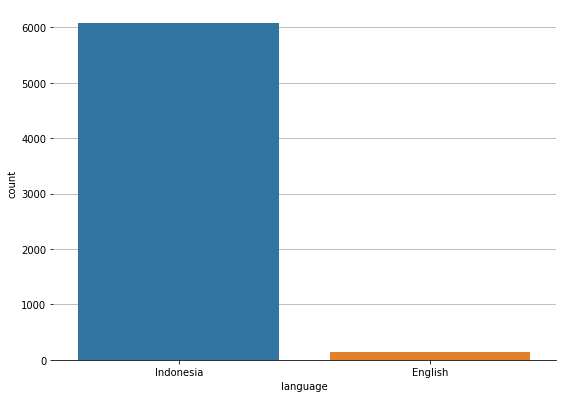

In [39]:
plt.figure(figsize=(9,6.5))
sns.countplot(df1.language)
plt.show()

There is a huge different amount between them. We could say that their main customers are probably **Indonesians**, so they stocked with our mother language

#### **Weight**

In [40]:
df1['weight'] = df1.weight.apply(lambda x:str(x).replace('kg','')).astype(float)
df1.loc[df1[df1['weight']>100].index,'weight'] = df1.loc[df1[df1['weight']>100].index,'weight']/100
df1.loc[df1[df1['weight']>2].index,'weight'] = df1.loc[df1[df1['weight']>2].index,'weight']/10
df1.loc[3595,'weight'] = 0.3

In [41]:
# I found some values that not fit with the real values ( checking with boxplot )

df1.loc[3812,'weight'] = 0.48
df1.loc[5827,'weight'] = 0.15

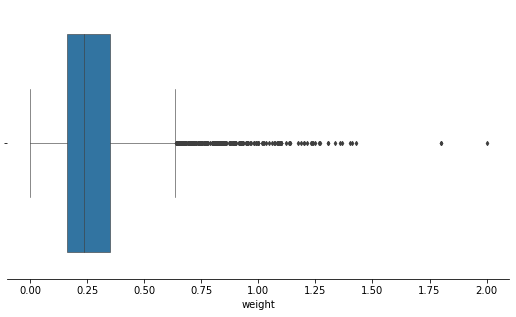

In [42]:
plt.figure(figsize=(9,5))
sns.boxplot(df1.weight,fliersize=3,linewidth=0.6,color='tab:blue')
plt.grid(False)
plt.show()

Great! There are **no more** books more than **2 kg**. It gave us a good sign that the books are of a normal size

#### **Length and Width**

In [43]:
df1.loc[~(df1.length.isna()),'length'] = df1[~(df1.length.isna())]['length'].apply(lambda x:str(x).replace('cm','')).astype(float)
df1.loc[~(df1.width.isna()),'width']   = df1[~(df1.width.isna())]['width'].apply(lambda x:str(x).replace('cm','')).astype(float)

idx3 = df1[(df1.width == 0)&(df1.cover!='EBook')] # fix the non-Ebook

width_na(df1,idx3.index[0], 15.5, 23)
width_na(df1,idx3.index[1], 13, 20)
width_na(df1,idx3.index[2], 10.67, 17.42)

In [44]:
df1.loc[idx3.index[0],'pages'] = 298
df1.loc[idx3.index[0],'weight'] = 0.6
df1.loc[idx3.index[1],'pages'] = 388
df1['length'] = df1.length.astype(float)

df1.loc[df1[df1.length>10000].index,'length'] = df1.loc[df1[df1.length>10000].index,'length']/1000
df1.loc[df1[df1.length>1000].index,'length'] = df1.loc[df1[df1.length>1000].index,'length']/100
df1.loc[df1[df1.width>1000].index,'width'] = df1.loc[df1[df1.width>1000].index,'width']/100
df1.loc[df1[df1.width>90].index,'width']  = df1.loc[df1[df1.width>90].index,'width']/10

# fix non ebook
idx4 = df1[(df1.length<6)&(df1.cover!='EBook')]
idx5 = df1[(df1.width<5)&(df1.cover!='EBook')]

In [45]:
# I found some values that not fit with the real values ( checking with boxplot )

df1.loc[2511,'length'] = 14
df1.loc[2511,'width']  = 21

In [46]:
df1.loc[idx4.index[0],'pages'] = 304
df1.loc[idx4.index[0],'length'] = 22
df1.loc[idx4.index[0],'price'] = 'Rp 85.000'
df1.loc[idx4.index[2],'pages'] = 268
df1.loc[idx4.index[2],'length'] = 15
df1.loc[idx4.index[3],'price'] = 'Rp 58.000'

df1.loc[idx5.index[1],'price'] = 'Rp 100.000'
df1.loc[idx5.index[1],'pages'] = 369

df1.loc[idx5.index[2],'price'] = 'Rp 113.936'

In [47]:
width_na(df1,idx5.index[0],14,21)
width_na(df1,idx5.index[1],13.5,20.7)
width_na(df1,idx5.index[2],14.86,21.64)

Replace NaN values in length with its median. In my opinion, this way is safer since this variable has some outliers

In [48]:
df1['length'] = df1['length'].fillna(df1['length'].median())

**Swap length and width if the length is more than the width**. This is the value should be because the normal book has the longer width

In [49]:
dummy_df = df1.copy()
idx_wl   = df1[df1.width<df1.length]

df1.loc[idx_wl.index,'width'] = dummy_df.length
df1.loc[idx_wl.index,'length'] = dummy_df.width

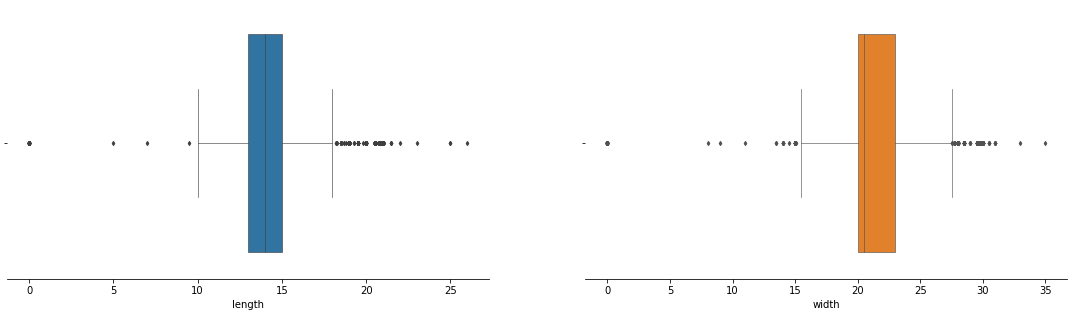

In [50]:
fig, ax = plt.subplots(1,2,figsize=(19,5))
sns.boxplot(df1.length,ax=ax[0],fliersize=3,linewidth=0.6,color='tab:blue')
sns.boxplot(df1.width,ax=ax[1],fliersize=3,linewidth=0.6,color='tab:orange')
ax[0].grid(False)
plt.grid(False)
plt.show()

Seems the length and width **don't have abnormal values**

Remember, zero length and width is E-book. and we will keep them for now

#### **Pages**

In [51]:
# value "pages" is publisher. Since this wrong types is not many, I fix them manually

df1.loc[df1[df1.pages=='GRAMEDIA PUSTAKA UTAMA'].index,'pages'] = 240
df1.loc[df1[df1.pages=='DIVAPRESS'].index,'price'] = 'Rp 60.000'
df1.loc[df1[df1.pages=='DIVAPRESS'].index,'pages'] = 120

df1.drop(index=df1[df1.pages == 'Harper Collins'].index,inplace=True)
idx6 = df1[df1.pages == 'None']

In [52]:
df1.loc[idx6.index[0],'price'] = 'Rp 151.000'
df1.loc[idx6.index[0],'pages'] = 400
df1.loc[idx6.index[1],'pages'] = 120
df1.loc[idx6.index[2],'pages'] = 178
df1.loc[idx6.index[3],'pages'] = 278

df1['pages'] = df1['pages'].astype(float)

**remove 0 pages** ( after checking these books, they are packages, not an individual book ) and also we will only take the book which no more than 2500 pages

In [53]:
df1 = df1[df1.pages<2500]
df1 = df1[~((df1.pages==0))]

#### **Cover**

In [54]:
df1.loc[df1[df1.cover.isna()].index,'cover'] = 'Soft Cover'
df1.replace({'cover':{'Print on Demand':'Soft Cover'}},inplace=True)

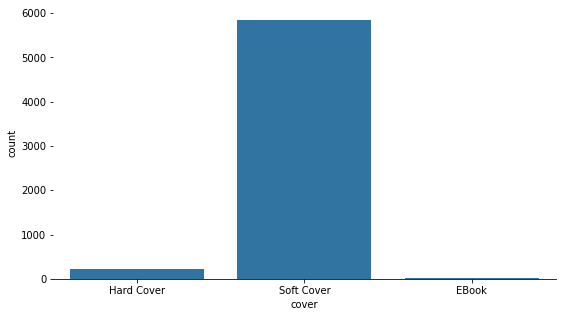

In [55]:
plt.figure(figsize=(9,5))
sns.countplot(df1.cover,color='tab:blue')
plt.grid(False)
plt.show()

There is a huge gap between either soft and hard cover or soft-cover and ebook. That makes sense. Because when I came to Gramedia, most of their books were covered with "soft stuff"

#### **Price**

In [56]:
df2 = df1.copy()

# remove "Rp" so that the data can be changed into float
df2['price'] = df2.price.apply(lambda m:str(m).replace('Rp','')).astype(float)*1000

In [57]:
df2.price.describe()

count    5661.000000  
mean     68175.710828 
std      37260.019189 
min      4800.000000  
25%      42500.000000 
50%      60720.000000 
75%      88000.000000 
max      398000.000000
Name: price, dtype: float64

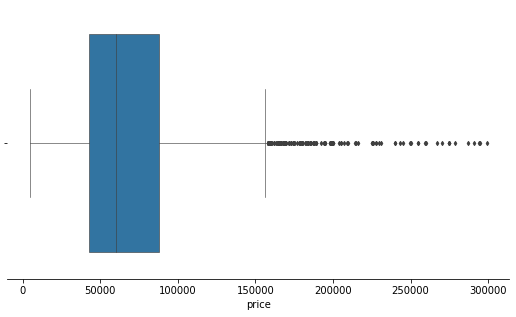

In [58]:
df2.drop(index=df2[df2.price>300000].index,inplace=True)

plt.figure(figsize=(9,5))
sns.boxplot(df2.price,fliersize=3,linewidth=0.6,color='tab:blue')
plt.grid(False)
plt.show()

Replace remaining NaN price by considering **pages, weight, cover, width, and length** from other data using KNN Regressor. Later, I will use other algorithms to model the data such as XGBoost, NGBoost, LGBM, etc ( will also include the category, language, year published, region, etc ). But, for this imputing missing values, I just use KNN to fill them without tuning any parameters

In [59]:
# df2.loc[df2[df2.pages==40][df2[df2.pages==40].price.isna()].index,'price'] = '56000'
# df2.loc[df2[df2.pages==30][df2[df2.pages==30].price.isna()].index,'price'] = df2[df2.pages == 30].price.mean()

In [60]:
idx_try = df2[df2.pages==40].price.isna() # for cheking the result of regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

df3 = df2[['cover', 'pages','weight','width','length','price']]
df3 = pd.get_dummies(df3,'cover')

In [239]:
impute = KNeighborsRegressor(n_neighbors=7,weights='distance')
scaler = MinMaxScaler()

In [240]:
X_test = df3[df3.price.isna()].drop(columns='price')
X_train  = df3.drop(index=X_test.index,columns='price')
y_train  = df3.drop(index=X_test.index).price
y_test = df3[df3.price.isna()].price
# X_train['pages'] = np.log(X_train['pages'])
scaler.fit(X_train)

MinMaxScaler()

In [241]:
X_train1 = scaler.transform(X_train)
X_test1  = scaler.transform(X_test)

In [242]:
impute.fit(X_train1,y_train)

KNeighborsRegressor(n_neighbors=7, weights='distance')

In [247]:
df_t = pd.concat([X_test,pd.DataFrame(impute.predict(X_test1),index=X_test.index)],axis=1).rename({0:'price'},axis=1)
df_t.sample(10,random_state=0)

,pages,weight,width,length,cover_EBook,cover_Hard Cover,cover_Soft Cover,price
3974,272.0,0.200,20.0,13.5,0,0,1,56257.580581
3069,220.0,0.230,21.0,14.5,0,0,1,57988.077883
1248,117.0,0.265,25.5,20.5,0,0,1,40005.394100
4561,288.0,0.160,20.0,13.5,0,0,1,71500.000000
274,40.0,0.040,20.0,14.0,0,0,1,5600.000000
5060,234.0,0.175,18.0,11.0,0,0,1,57874.665105
3238,218.0,0.350,20.5,16.0,0,0,1,72395.495151
4849,256.0,0.180,19.5,13.0,0,0,1,78627.119315
3812,388.0,0.480,20.0,13.0,0,0,1,85133.602364
3383,142.0,0.280,24.0,16.0,0,0,1,56499.451161


In [249]:
df_t.head()

,pages,weight,width,length,cover_EBook,cover_Hard Cover,cover_Soft Cover,price
38,30.0,0.045,20.0,14.0,0,0,1,8828.193662
41,152.0,0.215,23.0,15.5,0,0,1,60844.299069
88,40.0,0.040,20.0,14.0,0,0,1,5600.000000
91,320.0,0.250,20.5,12.5,0,0,1,68182.883152
168,40.0,0.040,20.0,14.0,0,0,1,5600.000000


After **validating** 15 sample **outcomes** of KNN regressor prediction above with the real price of the book ( *from Shopee and Tokopedia marketplace, since there is no information in Gramedia's website* ), the result is **satisfying** ( Lots of values have the same price and others are close with their real values ). Thus, let's put them into real dataset

In [251]:
df2.loc[df_t.price.index,'price'] = df_t.price

In [252]:
df2.price.describe()

count    6083.000000  
mean     67784.738243 
std      35689.999481 
min      4800.000000  
25%      43200.000000 
50%      61200.000000 
75%      87200.000000 
max      299000.000000
Name: price, dtype: float64

- Mean : from 68175.71 into 677844
- Median : from 60720 into 61200

The outcomes seem a bit better. Since the gap between mean and median is closer. It means that the skewness was decreased

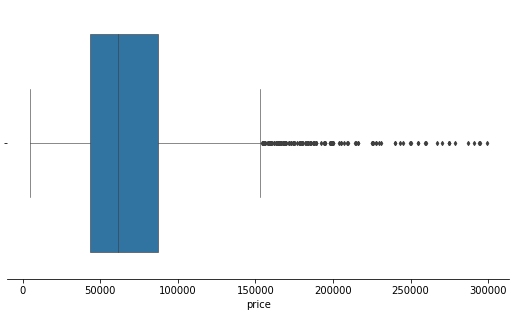

In [253]:
plt.figure(figsize=(9,5))
sns.boxplot(df2.price,fliersize=3,linewidth=0.6,color='tab:blue')
plt.grid(False)
plt.show()

#### **Region**

In [254]:
df2.region.value_counts()

Jakarta Timur        3101
Depok                940 
Jakarta Selatan      386 
Kota Bekasi          320 
Tangerang Selatan    298 
Kab Tangerang        167 
Kota Bogor           102 
Jakarta Barat        67  
Jakarta Utara        50  
Kota Bandung         44  
Kab Bogor            42  
Jakarta Pusat        37  
Kota Tangerang       32  
Karawang             14  
Kota Tasikmalaya     5   
Kota Cirebon         5   
Kota Sukabumi        5   
Garut                5   
Purwakarta           2   
Bekasi               1   
Manado               1   
Name: region, dtype: int64

Most store is in **Jakarta Timur** region. Followed by Depok, Jakarta Selatan, etc. 

From the data above we can say that the store in Jabodetabek area is more than outside Jabodetabek. So, we will bining this variable into **"jabodetabek"** and **"non-jabodetabek"**

*N.B. : Jabodetabek are Jakarta, Bogor, Depok, Tangerang, and Bekasi*
- reference : https://steemit.com/jabodetabek/@jabodetabek/what-is-jabodetabek

In [255]:
df2['region'] = df2['region'].fillna(df2['region'].mode()[0])

# jabodetabek
df2.loc[df2[df2.region.str.contains('Jakarta')].index,'region']   = 'jabodetabek'
df2.loc[df2[df2.region.str.contains('Depok')].index,'region']     = 'jabodetabek'
df2.loc[df2[df2.region.str.contains('Bekasi')].index,'region']    = 'jabodetabek'
df2.loc[df2[df2.region.str.contains('Tangerang')].index,'region'] = 'jabodetabek'
df2.loc[df2[df2.region.str.contains('Bogor')].index,'region']     = 'jabodetabek'

# non jabodetabek
df2.loc[df2[~(df2.region.str.contains('jabodetabek'))].index,'region']  = 'non-jabodetabek'

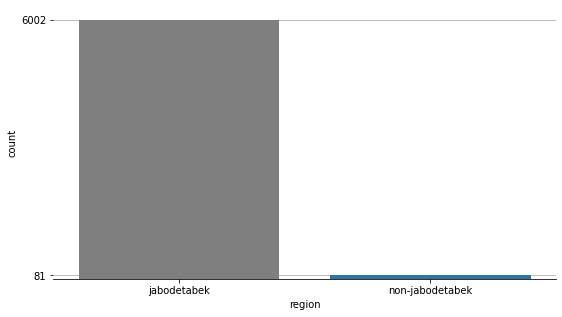

In [275]:
plt.figure(figsize=(9,5))
sns.countplot(df2.region,palette=['tab:gray','tab:blue'])
plt.yticks([(df2.region=='jabodetabek').sum(),(df2.region=='non-jabodetabek').sum()])
plt.show()

It does make sense. Since Jabodetabek is the capital and central of business area, the store mostly located in there

#### **Publisher**

I'll make it into **gramedia** and **non gramedia** publisher

- gramedia : Elex Media Komputindo, m&c!, Bhuana Ilmu Populer, and other names contains 'gramedia'
- non gramedia : else

Reference : https://www.kompasgramedia.com/business/retail-publishing

In [257]:
# gramedia
df2.loc[df2[df2.publisher.str.contains('Gramedia')].index,'publisher'] = 'gramedia'
df2.loc[df2[df2.publisher.str.contains('Bhuana Ilmu Populer')].index,'publisher'] = 'gramedia'
df2.loc[df2[df2.publisher.str.contains('Elex Media Komputindo')].index,'publisher'] = 'gramedia'
df2.loc[df2[df2.publisher.str.contains('m&c!')].index,'publisher'] = 'gramedia'

# non gramedia
df2.loc[df2[~(df2.publisher.str.contains('gramedia'))].index,'publisher'] = 'non-gramedia'

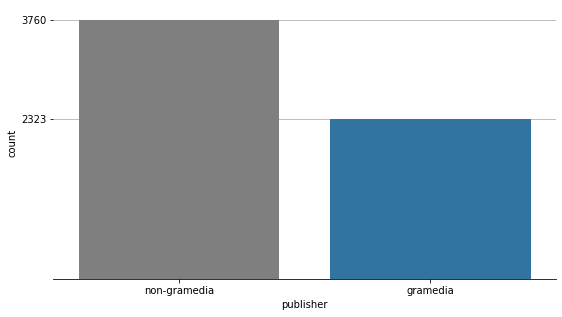

In [271]:
plt.figure(figsize=(9,5))
sns.countplot(df2.publisher,palette=['tab:gray','tab:blue'])
plt.yticks([(df2.publisher=='non-gramedia').sum(),(df2.publisher=='gramedia').sum()])
plt.show()

Interesting! Gramedia **sold more non-gramedia books** than theirs. Even though Gramedia is the biggest retail book in Indonesia, they aren't standalone. So many third-parties contribute onto their shelves-store

### The year of publication

To identify whether the pandemic caused or not on book prices at Gramedia, we will split the published year into before and during pandemic. According to https://www.halodoc.com/artikel/kronologi-lengkap-virus-corona-masuk-indonesia , the first covid case in Indonesia occured on Mar 2, 2021

In [279]:
df2.replace({'publish_date':{' Jan ':'-1-',
                             ' Feb ':'-2-',
                             ' Mar ':'-3-',
                             ' Apr ':'-4-',
                             ' Mei ':'-5-',
                             ' Jun ':'-6-',
                             ' Jul ':'-7-',
                             ' Agt ':'-8-',
                             ' Sep ':'-9-',
                             ' Okt ':'-10-',
                             ' Nov ':'-11-',
                             ' Des ':'-12-'
                            }},regex=True,inplace=True)

df2['publish_date'] = pd.to_datetime(df2['publish_date'])
pandemic = df2[df2['publish_date']>='2021-03-02']

In [280]:
df2['pandemic'] = 0
df2.loc[pandemic.index,'pandemic'] = 1 # during pandemic
df2.loc[df2.drop(index=pandemic.index).index,'pandemic'] = 0 # before pandemic

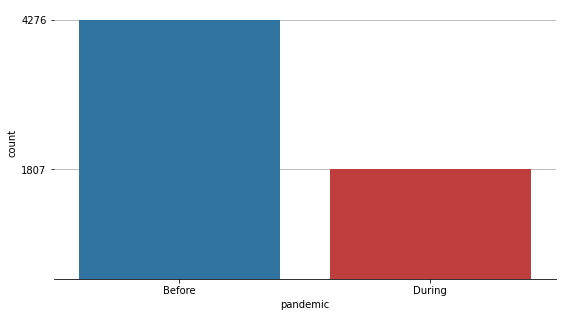

In [281]:
plt.figure(figsize=(9,5))
sns.countplot(df2.pandemic,palette=['tab:blue','tab:red'])
plt.xticks([0,1],['Before','During'])
plt.yticks([(df2.pandemic==0).sum(),(df2.pandemic==1).sum()])
plt.show()

### Create new column ( area )

As I mentioned before, I'll create "area" column from multiplication between width and length

This variable could be considered for the model later

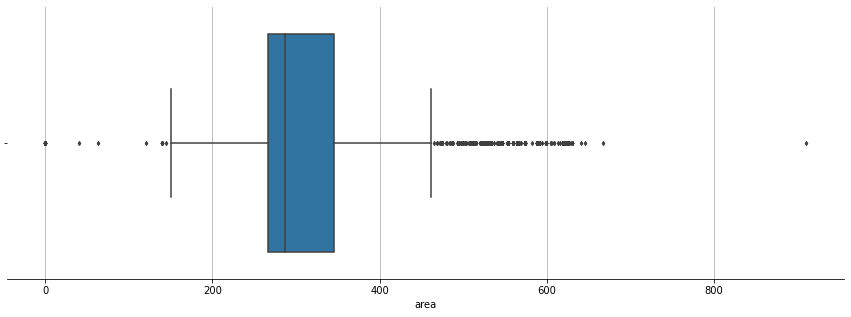

In [282]:
df2['area'] = df2.length*df2.width

sns.boxplot(df2.area,fliersize=3)
plt.show()

- There is one value ( larger than 800 m2 ) far from its friends. Let's drop it

In [154]:
df2 = df2[df2.area<800]

## Bivariate Analysis

In [155]:
def cat_visualize(data,colors):
    rcParams['axes.prop_cycle'] = cycler(color=colors)
    fig, ax = plt.subplots(2,3,figsize=(21,9))
    sns.boxplot(data.cover,data.price,ax=ax[0,0],fliersize=3,linewidth=0.6)
    sns.boxplot(data.publisher,data.price,ax=ax[0,1],fliersize=3,linewidth=0.6)
    sns.boxplot(data.language,data.price,ax=ax[1,1],fliersize=3,linewidth=0.6)
    sns.boxplot(data.region,data.price,ax=ax[1,0],fliersize=3,linewidth=0.6)
    sns.boxplot(data.category,data.price,ax=ax[0,2],fliersize=3,linewidth=0.6)
    sns.boxplot(data.subcategory,data.price,ax=ax[1,2],fliersize=3,linewidth=0.6)
    ax[1,2].set_xticklabels(labels=[i for i in data.subcategory.unique()],rotation=60)
    plt.show()

In [298]:
from cycler import cycler
def num_visualize(data,colors):
    num = ['weight','area','pages','length','width']
    rcParams['axes.prop_cycle'] = cycler(color=[colors])
    plt.figure(figsize=(20,10))
    for i in range(len(num)):
        plt.subplot(2, 3, i+1)
        sns.scatterplot(data[num[i]],data.price)
        
def cat_visualize(data,colors):
    cat = ['cover', 'publisher', 'language', 'region', 'category', 'subcategory','pandemic']
    rcParams['axes.prop_cycle'] = cycler(color=colors)
    plt.figure(figsize=(20,10))
    for i in range(len(cat)):
        plt.subplot(2, 4, i+1)
        sns.boxplot(data[cat[i]],data.price)
        plt.xticks(rotation=40)
        plt.xlabel('')

### Weight, width, length, area, the year of publication, and pages

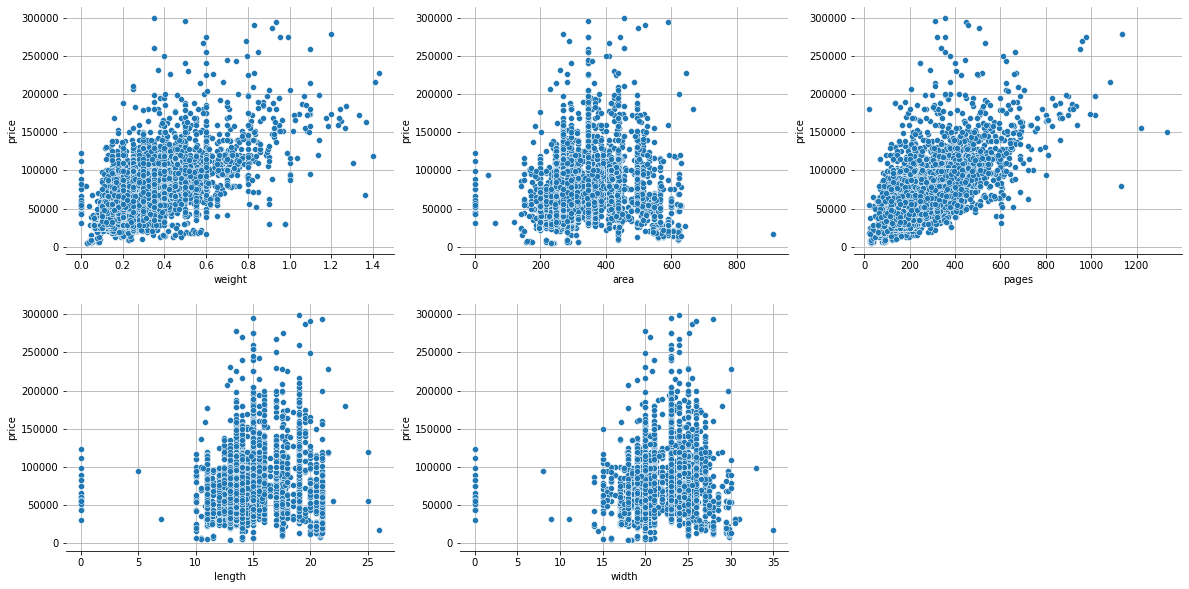

In [284]:
num_visualize(df2,'tab:blue')

### Weight, width, length, area, the year of publication, and pages **(without ebook)**

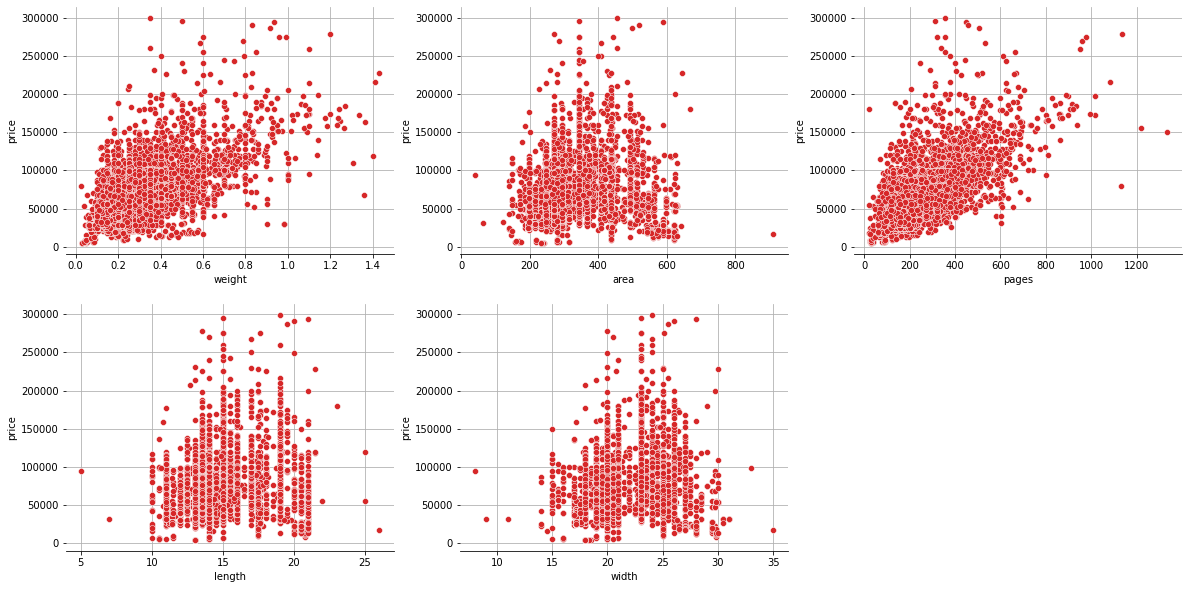

In [285]:
df_e = df2[df2.cover!='EBook']
num_visualize(df_e,'tab:red')

### Brief summary for numerical data 

In [303]:
bold_s = "\033[1m"
bold_e = "\033[0;0m"

print('Number of data :',df2.shape[0])
print(bold_s +'Skewness' + bold_e)
print(df2[df2.area<800].skew())

print('\nNumber of data (without E-Book) :',df_e.shape[0])
print(bold_s +'Skewness ' + bold_e)
print(df_e.skew())

Number of data : 6083
Skewness
pages       1.588847
weight      1.859323
width      -0.697667
length      0.148297
price       1.506425
pandemic    0.889050
area        1.136573
dtype: float64

Number of data (without E-Book) : 6055
Skewness 
pages       1.589498
weight      1.882513
width       0.824035
length      1.131060
price       1.504197
pandemic    0.883848
area        1.350275
dtype: float64


There is **no significant effect** after removing EBook. Even, the result seems like worse if we exclude the EBook. Thus we'll keep the EBook types for now

### Cover, Publisher, Language, Region, Category, Subcategory

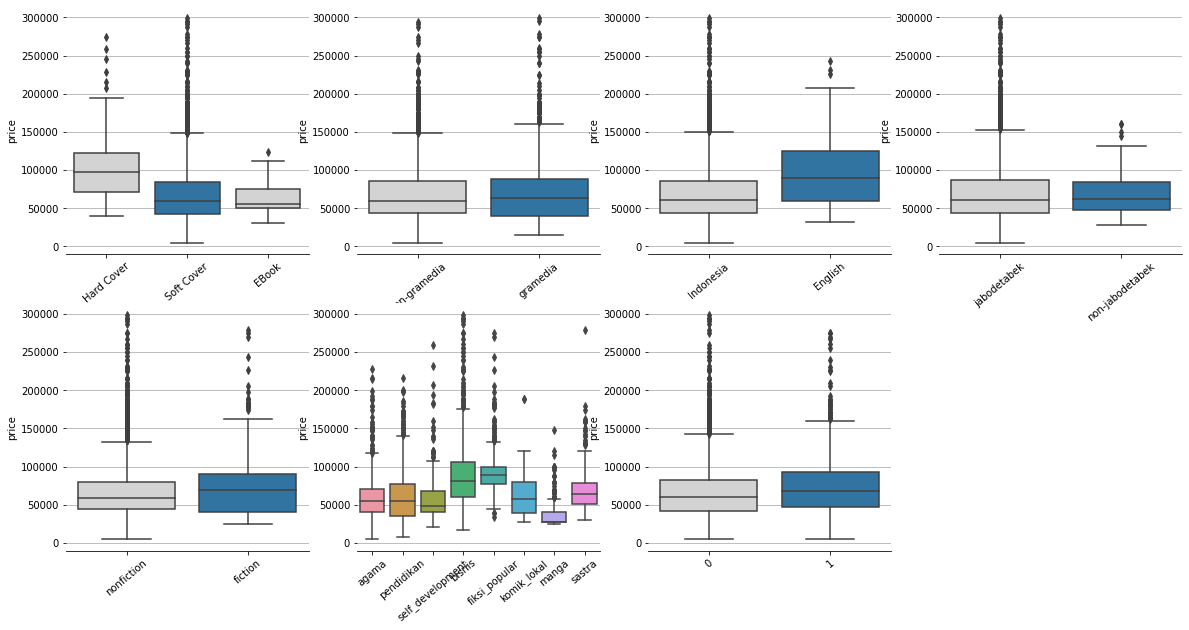

In [304]:
cat_visualize(df2,['lightgrey','tab:blue','lightgrey'])

In [306]:
df2.to_csv('D:/Data/gramed/cleaned_data.csv',index=False)